Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        9248      
____________________________________

Epoch 67/200
 - 3s - loss: 0.6709 - acc: 0.7653 - val_loss: 0.7529 - val_acc: 0.7421
Epoch 68/200
 - 3s - loss: 0.6685 - acc: 0.7668 - val_loss: 0.7145 - val_acc: 0.7593
Epoch 69/200
 - 3s - loss: 0.6622 - acc: 0.7684 - val_loss: 0.7177 - val_acc: 0.7528
Epoch 70/200
 - 3s - loss: 0.6661 - acc: 0.7676 - val_loss: 0.7147 - val_acc: 0.7533
Epoch 71/200
 - 3s - loss: 0.6608 - acc: 0.7698 - val_loss: 0.7511 - val_acc: 0.7428
Epoch 72/200
 - 3s - loss: 0.6611 - acc: 0.7702 - val_loss: 0.8486 - val_acc: 0.7105
Epoch 73/200
 - 3s - loss: 0.6614 - acc: 0.7663 - val_loss: 0.7551 - val_acc: 0.7364
Epoch 74/200
 - 3s - loss: 0.6554 - acc: 0.7714 - val_loss: 0.7137 - val_acc: 0.7600
Epoch 75/200
 - 3s - loss: 0.6605 - acc: 0.7700 - val_loss: 0.7780 - val_acc: 0.7307
Epoch 76/200
 - 3s - loss: 0.6591 - acc: 0.7707 - val_loss: 0.6906 - val_acc: 0.7616
Epoch 77/200
 - 3s - loss: 0.6505 - acc: 0.7744 - val_loss: 0.7139 - val_acc: 0.7568
Epoch 78/200
 - 3s - loss: 0.6549 - acc: 0.7701 - val_loss: 0.725

Epoch 163/200
 - 3s - loss: 0.6063 - acc: 0.7880 - val_loss: 0.6414 - val_acc: 0.7839
Epoch 164/200
 - 3s - loss: 0.6087 - acc: 0.7883 - val_loss: 0.6648 - val_acc: 0.7745
Epoch 165/200
 - 3s - loss: 0.6060 - acc: 0.7867 - val_loss: 0.7082 - val_acc: 0.7572
Epoch 166/200
 - 3s - loss: 0.6049 - acc: 0.7863 - val_loss: 0.7002 - val_acc: 0.7571
Epoch 167/200
 - 3s - loss: 0.6043 - acc: 0.7893 - val_loss: 0.6653 - val_acc: 0.7721
Epoch 168/200
 - 3s - loss: 0.6053 - acc: 0.7870 - val_loss: 0.6609 - val_acc: 0.7781
Epoch 169/200
 - 3s - loss: 0.6068 - acc: 0.7886 - val_loss: 0.6830 - val_acc: 0.7680
Epoch 170/200
 - 3s - loss: 0.6147 - acc: 0.7855 - val_loss: 0.7261 - val_acc: 0.7592
Epoch 171/200
 - 3s - loss: 0.6110 - acc: 0.7855 - val_loss: 0.6644 - val_acc: 0.7786
Epoch 172/200
 - 3s - loss: 0.6116 - acc: 0.7873 - val_loss: 0.6915 - val_acc: 0.7690
Epoch 173/200
 - 3s - loss: 0.6070 - acc: 0.7885 - val_loss: 0.6669 - val_acc: 0.7714
Epoch 174/200
 - 3s - loss: 0.6058 - acc: 0.7873 - val

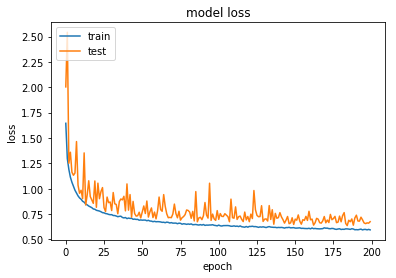

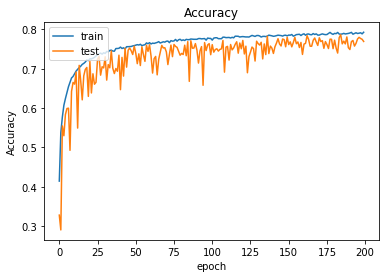

10000/10000 [==============================] - 0s 34us/step

Test accuracy: 77.5%


In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import SGD 
from keras.optimizers import Adam
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization



#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#transform labesls to one hot vector
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#normalization [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255



print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)




#3 layer CNN model
model = Sequential()

#First Layer
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

#Second Layer
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#Third Layer
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


#Output Layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#use SGD with nesterov and momentum as optimizer 
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

model.summary()

#training Parameters
batch_size = 128
epochs = 200


history = model.fit(x=X_train,y=y_train,batch_size = batch_size,epochs=epochs, verbose=2,validation_split=0.2)

#plotting of train error and tst error
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
plotLosses(history)

def plotAccuracy(history):  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
plotAccuracy(history)
    
    
    

    


# validate the model on test dataset to determine generalization
score = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1])) 